<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de clientes

Crear un modelo de segmentación para la estimación de los tipos de clientes que van de compras a un shoping<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Mall_Customers.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv > Mall_Customers.csv
    else:
        !wget Mall_Customers.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv

--2024-03-21 13:10:45--  http://mall_customers.csv/
Resolving mall_customers.csv (mall_customers.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customers.csv’
--2024-03-21 13:10:45--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2024-03-21 13:10:45 (54.2 MB/s) - ‘Mall_Customers.csv’ saved [3981/3981]

FINISHED --2024-03-21 13:10:45--
Total wall clock time: 0.2s
Downloaded: 1 files, 3.9K in 0s (54.2 MB/s)


### `Mall_Customers.csv`:
El dataset **`Mall_Customers.csv`** contiene datos sobre clientes que asisten al shopping a comprar, y sus características de consumo.<br>
[Dataset source](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
- **CustomerID** --> id del comprador, ejemplo 5
- **Gender** --> género, masculino (Male) o femenino (female)
- **Age** --> edad
- **Annual Income** --> ingreso de dinero anual de la persona en miles de dolares
- **Spending socre** --> que tan gastador es la persona (de 1 a 100)

In [3]:
df = pd.read_csv("Mall_Customers.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Alumno: Los algoritmos de clustering no funcionan bien con las variables categóricas,
# obtener un nuevo dataset (df2) sin la columna CustomerID y Gender
df2 = df.drop(['CustomerID', 'Gender'], axis=1)

In [7]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
valores_faltantes = df2.isnull().sum()
valores_faltantes

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
df2.shape[0]

(200, 3)

# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

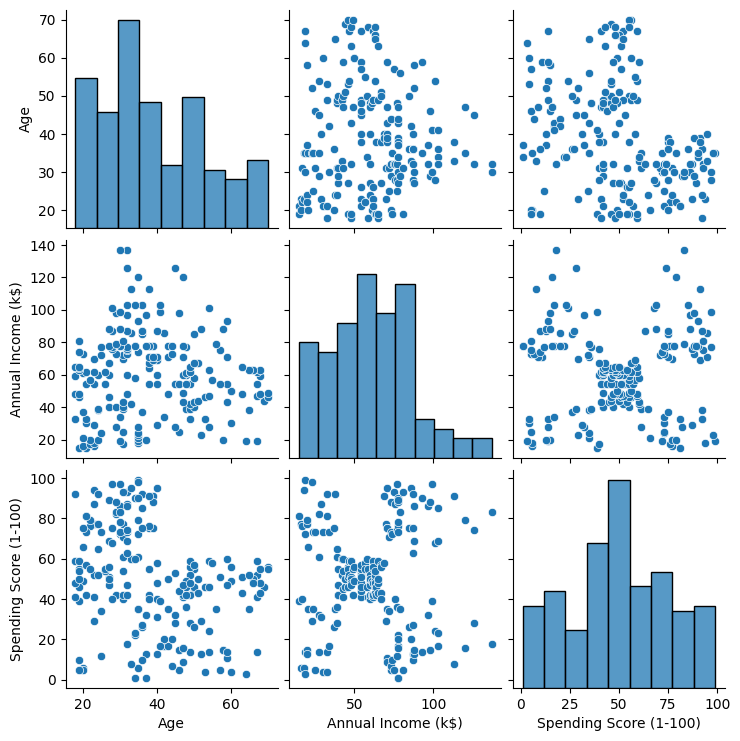

In [11]:
# Observar todas las relaciones entre todos los features, utilizar pairplot
# Crear un pairplot
sns.pairplot(df2)

# Mostrar el pairplot
plt.show()

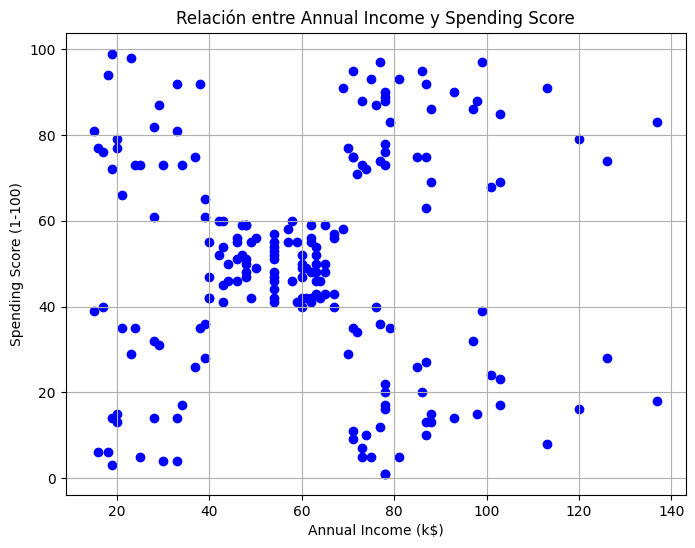

In [13]:
# Alumno: Se puede observar que donde se ve claramente una segmentación de grupos
# en en la relación de "Annual Income" y "Spending Socre"
# Graficar unicamente la relación x=Annual Income con y=SpendingScore
# con un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='blue')
plt.title('Relación entre Annual Income y Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [14]:
# Almuno: Crear un numpy array "X" con los features de entrada (Annual Income y Spending Score)
from sklearn.cluster import KMeans

# Seleccionar las características "Annual Income" y "Spending Score"
X_features = df2[['Annual Income (k$)', 'Spending Score (1-100)']]

# Convertir las características seleccionadas a un numpy array
X = np.array(X_features)

# Crear y entrenar el modelo de segmentación KMeans
n_clusters = 5
init_method = 'k-means++'
max_iter = 300

modelo_kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter)
modelo_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [15]:
# Almuno: Entrenar diferentes modelos de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion


# Crear un rango de clusters de 2 a 10
rango_clusters = range(2, 11)

# Lista para almacenar las inercias de los modelos
inercias = []

# Iterar sobre el rango de clusters
for n_clusters in rango_clusters:
    # Crear y entrenar el modelo de KMeans
    modelo_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    modelo_kmeans.fit(X)

    # Calcular la inercia y almacenarla
    inercia = modelo_kmeans.inertia_
    inercias.append(inercia)

    # Imprimir la inercia para el número actual de clusters
    print(f'Número de clusters: {n_clusters}, Inercia: {inercia}')

# Mostrar las inercias para todos los modelos entrenados
print("Inercias para diferentes números de clusters:")
for n_clusters, inercia in zip(rango_clusters, inercias):
    print(f"Número de clusters: {n_clusters}, Inercia: {inercia}")

Número de clusters: 2, Inercia: 181363.59595959593
Número de clusters: 3, Inercia: 106348.37306211122
Número de clusters: 4, Inercia: 73679.78903948836
Número de clusters: 5, Inercia: 44448.4554479337
Número de clusters: 6, Inercia: 37233.814510710006
Número de clusters: 7, Inercia: 30259.65720728547
Número de clusters: 8, Inercia: 25011.839349156588
Número de clusters: 9, Inercia: 21862.092672182895
Número de clusters: 10, Inercia: 19672.072849014323
Inercias para diferentes números de clusters:
Número de clusters: 2, Inercia: 181363.59595959593
Número de clusters: 3, Inercia: 106348.37306211122
Número de clusters: 4, Inercia: 73679.78903948836
Número de clusters: 5, Inercia: 44448.4554479337
Número de clusters: 6, Inercia: 37233.814510710006
Número de clusters: 7, Inercia: 30259.65720728547
Número de clusters: 8, Inercia: 25011.839349156588
Número de clusters: 9, Inercia: 21862.092672182895
Número de clusters: 10, Inercia: 19672.072849014323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

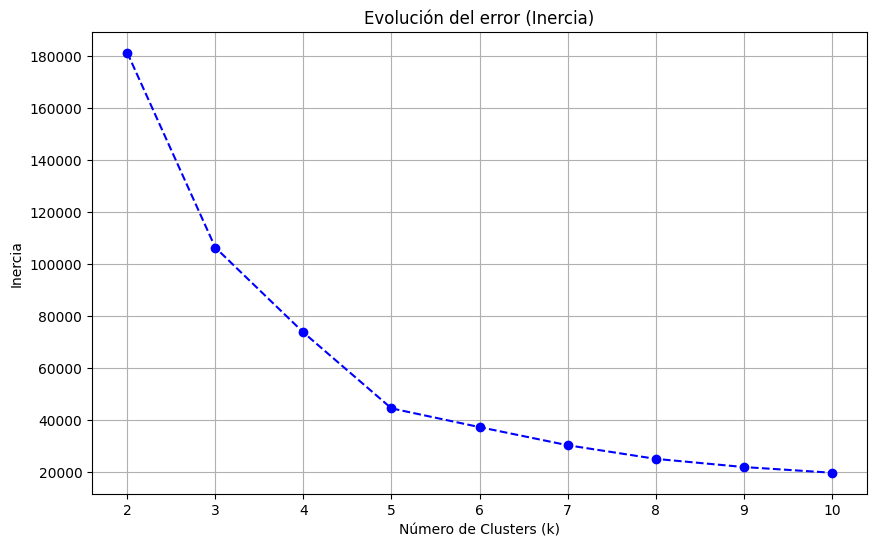

In [17]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point) para deteminar el mejor k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inercias, marker='o', linestyle='--', color='b')
plt.title('Evolución del error (Inercia)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [18]:
# Alumno: Entrenar el modelo con el mejor "K" encontrado
# y determinar los labels
modelo_mejor_k = KMeans(n_clusters=5, random_state=42)
modelo_mejor_k.fit(X)

# Determinar los labels para cada punto en el conjunto de datos
labels = modelo_mejor_k.labels_

# Imprimir los labels obtenidos
print("Labels obtenidos:", labels)

Labels obtenidos: [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Alumno: Sumar la columna de labels con el nombre de custseg (customer segmentation)
# a su dataset
df['custseg'] = labels


df.head()
labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [23]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import accuracy_score

# Etiquetas verdaderas
etiquetas_verdaderas = df['custseg']

# Calcular la exactitud
exactitud = accuracy_score(etiquetas_verdaderas, labels)

exactitud

1.0

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

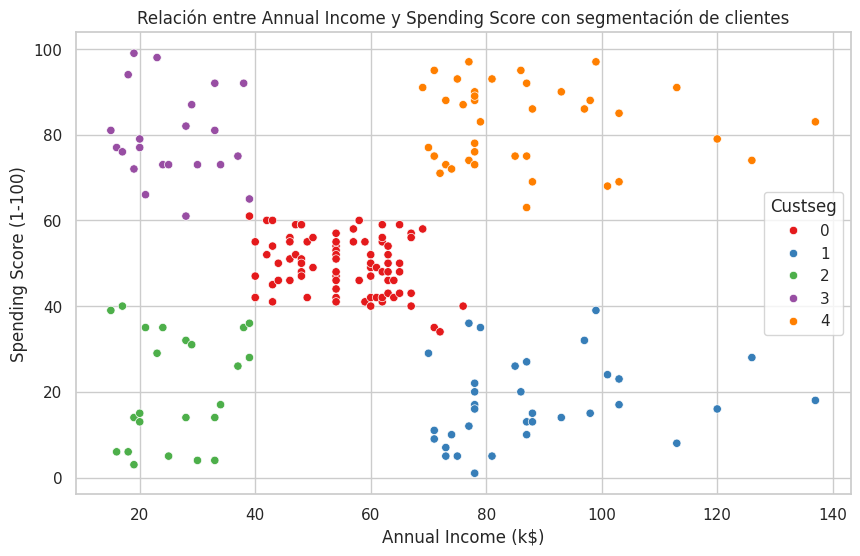

In [24]:
# Alumno: Volver a repetir el gráfico de scatter "Annual Income" y "Spending Socre"
# pero ahora coloreando con "hue" los puntos según su clase de custseg
sns.set(style="whitegrid")

# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='custseg', palette='Set1')
plt.title('Relación entre Annual Income y Spending Score con segmentación de clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Custseg')
plt.show()